Importing the SeqIO module

In [23]:
from Bio import SeqIO

sequence is dowloaded from the link below

In [ ]:
https://cocalc.com/share/download/df81e09e5b8f16f28b3a2e818dcdd4560e7818ae/support/2015-04-02-ISB-notes/ls_orchid.fasta.txt

Using SeqIO module to read the sequence and print the sequence, sequence id and length of the sequence.

In [8]:
from Bio import SeqIO
sequences = []
for sequencei in SeqIO.parse('ls_orchid.fasta.txt','fasta'):
    sequences.append(str(sequencei.seq))
    print(sequencei.seq)
    print(sequencei.id)
    print(len(sequencei))

CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC
gi|2765658|emb|Z78533.1|CIZ78533
740
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATATGATCGAGTGAATCTGGAGGACCTGTGGTAACTCAGCTCGTCGTGGCACTGCTTTTGTCGTGACCCTGCTTTGTTGTTGGGCCTCCTCAAGAGCTTTCATGGCAGGTTTGAACTTTAGTACGGTGCAGTTTGCGCCAAGTCATATAAAGCATCACTGATGAA

SimpleFastaParser reads the fasta files faster than the SeqIO parse and used for speeding up the process in the case of large files

In [17]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
with open('ls_orchid.fasta.txt') as file:
    for seq_id, seq in SimpleFastaParser(file):
        print(seq_id)
        print(str(seq))

gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC
gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATATGATCGAGTGAATCTGGAGGACCTGTGGTAAC

Finding the gc content manually using SeqIO

In [9]:
from Bio import SeqIO
max_gc_id = None
max_gc_content = 0
for sequencei in SeqIO.parse('ls_orchid.fasta.txt','fasta'):
    sequence = str(sequencei.seq)
    sequence_id = sequencei.id
    gc_content = (sequence.count('C') + sequence.count('G')*100)/(len(sequence))
    if gc_content > max_gc_content:
        max_gc_content = gc_content
        max_gc_id = sequence_id
print(max_gc_id)
print(max_gc_content)

gi|2765658|emb|Z78533.1|CIZ78533
32.83783783783784


The Seq object 
It is a python string combined with biological methods

In [10]:
from Bio.Seq import Seq
sequence = Seq('AGTACACTTGGT')
print(sequence)

AGTACACTTGGT


The Seq object
Seq object has a method 'count()'
it gives non overlapping count

In [14]:
sequence = Seq('AAAGCGCAA')
sequence.count('AA')

2

count_overlap() methods gives overlapping counts

In [15]:
sequence.count_overlap('AA')

3

To Calculate GC content

In [21]:
from Bio.SeqUtils import gc_fraction
gc_content = gc_fraction(sequence)*100
print(f'GC content : {gc_content}%')

GC content : 37.5%


**Transcription**
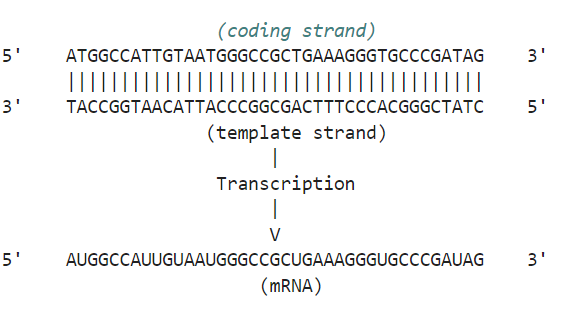

1) Find the template strand from coding strand
2) Find the mRNA strand from coding strand
3) Find coding strand from mRNA strand

In [25]:
from Bio.Seq import Seq
coding_strand = Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')
#1 --->
#Find the template strand from coding strand
#reverse_complement()
    
template_strand = coding_strand.reverse_complement()

#2 ---> 
#Find the mRNA strand from coding strand
#transcribe()

mrna_strand = coding_strand.transcribe()

#3 ---> 
#Find coding strand from mRNA strand
#back_transcribe()

coding_strand = mrna_strand.back_transcribe()

print(coding_strand)
print(template_strand)
print(mrna_strand)


ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT
AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG
